In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("carPrices.csv")
df

,Unnamed: 0,Car Model,Mileage,Sell Price($),Age(yrs)
0,0,BMW X5,69000,18000,6
1,1,BMW X5,35000,34000,3
2,2,BMW X5,57000,26100,5
3,3,BMW X5,22500,40000,2
4,4,BMW X5,46000,31500,4
5,5,Audi A5,59000,29400,5
6,6,Audi A5,52000,32000,5
7,7,Audi A5,72000,19300,6
8,8,Audi A5,91000,12000,8
9,9,Mercedes Benz C class,67000,22000,6


In [3]:
df.columns

Index(['Unnamed: 0', 'Car Model', 'Mileage', 'Sell Price($)', 'Age(yrs)'], dtype='object')

In [7]:
df.drop(['Unnamed: 0'], axis="columns")

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedes Benz C class,67000,22000,6


In [12]:
dummy_columns = pd.get_dummies(df["Car Model"])
dummy_columns

,Audi A5,BMW X5,Mercedes Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [13]:
# Concatenate the columns
df_new = pd.concat([df,dummy_columns], axis="columns" )
df_new

,Unnamed: 0,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedes Benz C class
0,0,BMW X5,69000,18000,6,0,1,0
1,1,BMW X5,35000,34000,3,0,1,0
2,2,BMW X5,57000,26100,5,0,1,0
3,3,BMW X5,22500,40000,2,0,1,0
4,4,BMW X5,46000,31500,4,0,1,0
5,5,Audi A5,59000,29400,5,1,0,0
6,6,Audi A5,52000,32000,5,1,0,0
7,7,Audi A5,72000,19300,6,1,0,0
8,8,Audi A5,91000,12000,8,1,0,0
9,9,Mercedes Benz C class,67000,22000,6,0,0,1


In [14]:
df_new.columns

Index(['Unnamed: 0', 'Car Model', 'Mileage', 'Sell Price($)', 'Age(yrs)',
       'Audi A5', 'BMW X5', 'Mercedes Benz C class'],
      dtype='object')

In [15]:
# drop one of the dummy variables, car model and unnamed columns 
df = df_new.drop(['Unnamed: 0', 'Car Model','Audi A5'], axis="columns")
df

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedes Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


### Exploratory Data Analysis
- Draw scatter plots to determine what the relationship is between various elements 

Text(0, 0.5, 'Price')

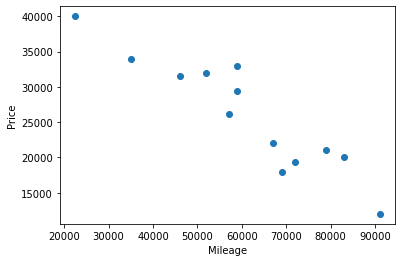

In [19]:
x = df['Mileage']
y = df['Sell Price($)']

plt.scatter(x,y)
plt.xlabel("Mileage")
plt.ylabel("Price")

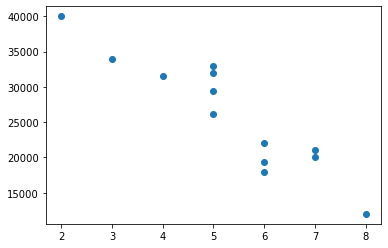

In [20]:
plt.scatter(df['Age(yrs)'], df['Sell Price($)'])

There is a negative linear relationship between the mileage, age and the price at which the car is sold at 


## MODEL TRAINING

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()

In [25]:
x = df.drop('Sell Price($)', axis="columns")
x

,Mileage,Age(yrs),BMW X5,Mercedes Benz C class
0,69000,6,1,0
1,35000,3,1,0
2,57000,5,1,0
3,22500,2,1,0
4,46000,4,1,0
5,59000,5,0,0
6,52000,5,0,0
7,72000,6,0,0
8,91000,8,0,0
9,67000,6,0,1


In [27]:
y = df['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [29]:
model.fit(x, y)    # Model Training completed

LinearRegression()

## Prediction Assignments 
1. Predict the price of a Benz that is 4 years old with 45000 mileage
2. Predict price of BMW X5 that is 7 yeras old with 86000 mileage
3. Check the accuracy score of the model 

In [34]:
model.score(x,y)

0.9417050937281083

In [35]:
model.predict([[45000,4,0,1]])   # Benz Price

array([36991.31721061])

In [36]:
model.predict([[86000,7,1,0]])   # BMW Price 

array([11080.74313219])